# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.37659301943435236
rmse median 0.45553787956272374


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.14992427752270623
mean error unbiased -0.00824499044315727


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [6]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

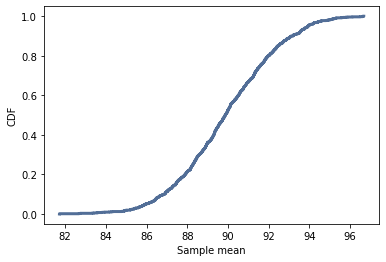

In [7]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(xbars)

89.92005728010096

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.95139793911189, 93.92200584654594)

And the RMSE of the sample means is called the standard error.

In [10]:
stderr = RMSE(xbars, 90)
stderr

2.4199168453491917

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 0.9377714067838588
rmse Lm 1.4100166781798495
mean error L 0.26406134644127277
mean error Lm 0.2770597843137133


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise 8-1:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [18]:
# In this exercise I will go off the previous estimates on page 92
# to create one that sees if 𝑥¯and median are biased estimates of µ 
# by basing my estimate off of estimate one that uses n in the range 
# which is the size of the sample that is used to compute x and m is 
# the number of times we run the experiment. while also using the example
# estimate that guesses the variance on page 93 and 94 to check for biased
# by using the mean error which computes the mean difference between the 
# estimates and the actual value on the means xbar and medians median with mu.
def Theos_estimate(n=7, m=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('The xbar has a:', MeanError(means, mu),'low mean error as the experiment runs.')
    print('The mean has a:', MeanError(medians, mu),'low mean error as the experiment runs.')
    
Theos_estimate()

The xbar has a: 0.002336123680779576 low mean error as the experiment runs.
The mean has a: 0.003521576682291424 low mean error as the experiment runs.


In [61]:
# As seen on page 93 we can use the guess the variance approach to help 
# form our estimate to check whether 𝑆2 or s2 n-1 yields a lower MSE.
# That simulates by the use of a function by playing an estimation game
# and tests the performance of s2 and s2n-1 to see if it yields a lower
# MSE as we calculated the RMSE on the estimate 1 and 2 to check for 
# biased and unbiased.

def Theos2estimate(n=7, m=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        unbiased = np.var(xs, ddof=1)
        biased = np.var(xs)
        estimates1.append(unbiased)
        estimates2.append(biased)

    print('The unbiased MSE is:', RMSE(estimates1, sigma**2),'which is higher than the biased MSE below')
    print('The biased MSE is:', RMSE(estimates2, sigma**2),'which is lower than the unbiased MSE above')
    print('Explanation: This tells us that as the number of times we run the experiment goes up we see that the unbiased MSE continue to be above the biased MSE')

Theos2estimate()

The unbiased MSE is: 0.5986144276812096 which is higher than the biased MSE below
The biased MSE is: 0.5283765078105719 which is lower than the unbiased MSE above
Explanation: This tells us that as the number of times we run the experiment goes up we see that the unbiased MSE continue to be above the biased MSE


**Exercise 8-2:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



The standard error is shown as: 0.7196816553501985
The confidence interval is shown as: (1.3117371433534322, 3.1063529499666025)


0.7196816553501985

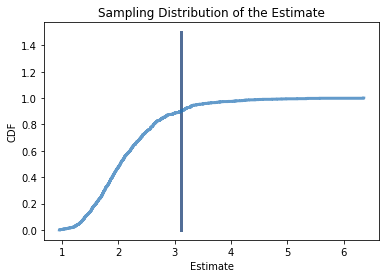

In [62]:
# For this exercise I will use the example on sampling distibutions on 
# page 94 as expo is the lambda which indicates the wavelength of any wave.
# while n represents the sample size of 10 while m is the number of
# times we run the experiment such as a 1000. As this plot is plotting
# tuple index of the confidence interval at 1. 

def plot_estimate(expo=2, n=10, m=1000):
    def plot(x, y=1.5):
        thinkplot.Plot([x, x], [0, y])

    estimates = []
    for _ in range(m):
        xs = np.random.exponential(1.0/expo, n)
        lamb = 1.0 / np.mean(xs)
        estimates.append(lamb)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(90)
    plot(ci[1])
    standard_error = RMSE(estimates, expo)
    print('The standard error is shown as:', standard_error)
    print('The confidence interval is shown as:', ci)

    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Estimate', ylabel='CDF', title='Sampling Distribution of the Estimate')

    return standard_error

plot_estimate()

The standard error is shown as: 0.089645841713083
The confidence interval is shown as: (1.8559160771028491, 2.1136956230798276)


0.089645841713083

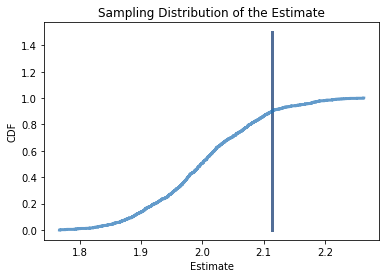

In [63]:
# For this exercise I will use the example on sampling distibutions on 
# page 94 as expo is the lambda which indicates the wavelength of any wave.
# while n represents the sample size of 500 while m is the number of
# times we run the experiment such as a 1000. As this plot is plotting
# tuple index of the confidence interval at 1. 

def plot_estimate(expo=2, n=500, m=1000):
    def plot(x, y=1.5):
        thinkplot.Plot([x, x], [0, y])

    estimates = []
    for _ in range(m):
        xs = np.random.exponential(1.0/expo, n)
        lamb = 1.0 / np.mean(xs)
        estimates.append(lamb)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(90)
    plot(ci[1])
    standard_error = RMSE(estimates, expo)
    print('The standard error is shown as:', standard_error)
    print('The confidence interval is shown as:', ci)

    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Estimate', ylabel='CDF', title='Sampling Distribution of the Estimate')

    return standard_error

plot_estimate()

As seen above we see that in the first example with a sample size of 10 we have a higher standard error and confidence interval then we see when our sample size is higher on the second example with a sample size of 500. As this makes sense as the sample size increases we see that the standard error decreases because more tests are used which lower the room for error. While also seeing the confidence interval become closer together as the sample size goes up.

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [17]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [18]:
# Solution goes here

In [19]:
# Solution goes here